In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
import usb.core
import usb.util
import usb.backend.libusb1

In [2]:
from utils.geometrie import *
from utils.fonctions_utils import *

In [3]:
#coord_micros = [] # rentrer à la main les coordonnées
coord_micros = coordonnees_micros_xml_sorted('utils/xml/micgeom.xml') # récupérer les coordonnées depuis un fichier XML

In [4]:
## Acquisition ##

backend = usb.backend.libusb1.get_backend()
dev = usb.core.find(idVendor=0xfe27, idProduct=0xac03) 

Nmics = 16
length = 32768
Nseg = (4 * length * Nmics) // 1024
Z = np.zeros([1024, Nseg])

transitoire = 20000

# transferts
for n in range(Nseg):
    # lire la doc megamicro
    dev.ctrl_transfer(0x40, 0xB1, 0, 0, [0x02]) # envoie la requete pour pouvoir ecouter sur le port usb
    Z[:, n] = dev.read(0x81, 1024, 1000) # lire le donnees et le mettre dans un tableau numpy

U = Z.T.ravel()
# reconstruction des int32 (naif) 
V = U.reshape([length * Nmics, 4])
W = V[:, 3] * 256**3 + V[:, 2] * 256**2 + V[:, 1] * 256 + V[:, 0]
W[W > 2**31] = W[W > 2**31] - 2**32
# normalisation
W = W / np.max(np.abs(W))
# restructuration en canaux pour pouvoir etre envoye a la partie traitement
R = W.reshape([W.shape[0] // Nmics, Nmics])
# on enlève le début (silence et transitoire)
data = R[int(transitoire):, :]

## Réarrangement ##
def ordre_micros(matrice_acquisition):
    """
    Remets dans l'ordre les microphones en échangeant les colonnes 
    de la matrice d'acquisition.

    Parameters:
    matrice_acquisition (np.ndarray): matrice d'acquisition.

    Returns:
    np.ndarray: matrice réarrangée.
    """
    matrice_arangee = np.zeros(matrice_acquisition.shape, dtype="complex_")
    # De 0 à 7
    matrice_arangee[:, 8] = matrice_acquisition[:, 0]
    matrice_arangee[:, 9] = matrice_acquisition[:, 1]
    matrice_arangee[:, 10] = matrice_acquisition[:, 2]
    matrice_arangee[:, 11] = matrice_acquisition[:, 3]
    matrice_arangee[:, 12] = matrice_acquisition[:, 4]
    matrice_arangee[:, 13] = matrice_acquisition[:, 5]
    matrice_arangee[:, 14] = matrice_acquisition[:, 6]
    matrice_arangee[:, 15] = matrice_acquisition[:, 7]

    # De 8 à 15
    matrice_arangee[:, 7] = matrice_acquisition[:, 8]
    matrice_arangee[:, 6] = matrice_acquisition[:, 9]
    matrice_arangee[:, 5] = matrice_acquisition[:, 10]
    matrice_arangee[:, 4] = matrice_acquisition[:, 11]
    matrice_arangee[:, 3] = matrice_acquisition[:, 12]
    matrice_arangee[:, 2] = matrice_acquisition[:, 13]
    matrice_arangee[:, 1] = matrice_acquisition[:, 14]
    matrice_arangee[:, 0] = matrice_acquisition[:, 15]
    return matrice_arangee

rdata = ordre_micros(data)

## Vérification ##

verification_position(data.T, rdata.T, coord_micros)

NoBackendError: No backend available

Detected mic index: 5 -> 13


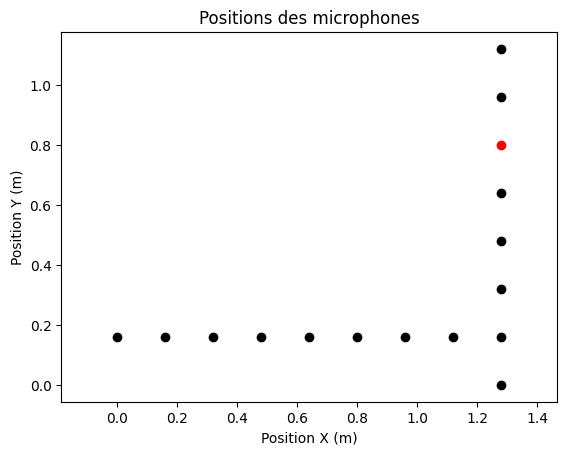

In [12]:
data = np.zeros((32768, 16))
data[:, 5] = 1

## Réarrangement ##

def ordre_micros(matrice_acquisition):
    """
    Remets dans l'ordre les microphones en échangeant les colonnes 
    de la matrice d'acquisition.

    Parameters:
    matrice_acquisition (np.ndarray): matrice d'acquisition.

    Returns:
    np.ndarray: matrice réarrangée.
    """
    matrice_arangee = np.zeros(matrice_acquisition.shape, dtype="complex_")
    # De 0 à 7
    matrice_arangee[:, 8] = matrice_acquisition[:, 0]
    matrice_arangee[:, 9] = matrice_acquisition[:, 1]
    matrice_arangee[:, 10] = matrice_acquisition[:, 2]
    matrice_arangee[:, 11] = matrice_acquisition[:, 3]
    matrice_arangee[:, 12] = matrice_acquisition[:, 4]
    matrice_arangee[:, 13] = matrice_acquisition[:, 5]
    matrice_arangee[:, 14] = matrice_acquisition[:, 6]
    matrice_arangee[:, 15] = matrice_acquisition[:, 7]

    # De 8 à 15
    matrice_arangee[:, 7] = matrice_acquisition[:, 8]
    matrice_arangee[:, 6] = matrice_acquisition[:, 9]
    matrice_arangee[:, 5] = matrice_acquisition[:, 10]
    matrice_arangee[:, 4] = matrice_acquisition[:, 11]
    matrice_arangee[:, 3] = matrice_acquisition[:, 12]
    matrice_arangee[:, 2] = matrice_acquisition[:, 13]
    matrice_arangee[:, 1] = matrice_acquisition[:, 14]
    matrice_arangee[:, 0] = matrice_acquisition[:, 15]
    return matrice_arangee

rdata = ordre_micros(data)

## Vérification ##

verification_position(data.T, rdata.T, coord_micros)